## Metadata Analysis

In [52]:
import pandas as pd
import altair as alt

In [77]:
meta = pd.read_csv('bill-meta.csv', index_col='id')
print(len(meta))
meta.head(2)

9223


,legislation_number,url,congress,amends_bill,title,sponsor,date_of_introduction,date_offered,date_submitted,date_proposed,number_of_cosponsors,committees,latest_action_date,latest_action,subject,sponsor_party
id,,,,,,,,,,,,,,,,
115 H.R. 3823,H.R. 3823,https://www.congress.gov/bill/115th-congress/h...,115th Congress (2017-2018),NaN,Disaster Tax Relief and Airport and Airway Ext...,"Rep. Brady, Kevin [R-TX-8]",09/25/2017,NaN,NaN,NaN,2,"House - Ways and Means, Transportation and Inf...",09/29/2017,Became Public Law No: 115-63.,Taxation,R
115 H.R. 88,H.R. 88,https://www.congress.gov/bill/115th-congress/h...,115th Congress (2017-2018),NaN,Shiloh National Military Park Boundary Adjustm...,"Rep. Blackburn, Marsha [R-TN-7]",01/03/2017,NaN,NaN,NaN,0,House - Natural Resources | Senate - Energy an...,12/21/2018,Message on House action received in Senate and...,Taxation,R


## Counts per subject

In [78]:
data = meta.groupby(['subject', 'sponsor_party']).size().to_frame('count').reset_index()
data.head(2)

,subject,sponsor_party,count
0,Agriculture and Food,D,180
1,Agriculture and Food,I,1


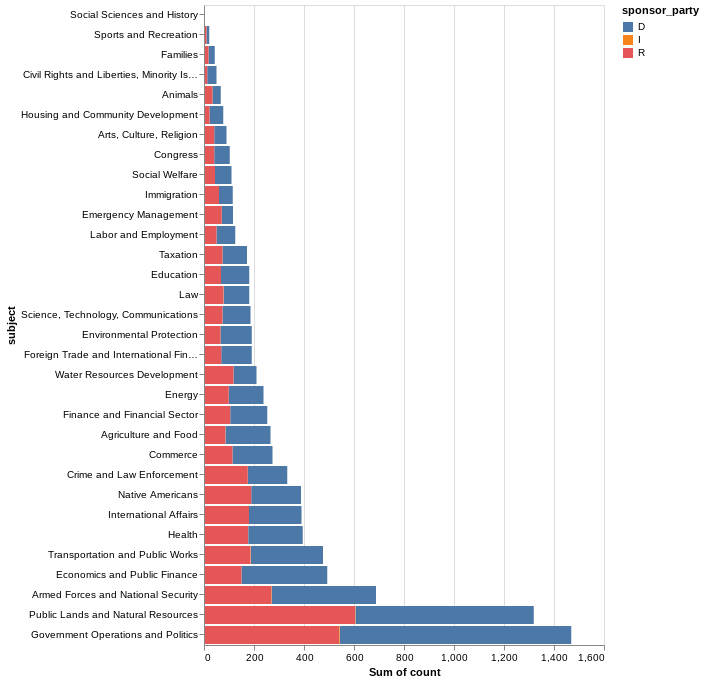

In [79]:
alt.Chart(data).mark_bar().encode(
    x = 'sum(count):Q',
    y = alt.Y('subject:N', sort=alt.EncodingSortField(field='count', op='sum')),
    color='sponsor_party:N',
    order=alt.Order("sponsor_party", sort='descending')
)

In [80]:
by_party = meta.query('sponsor_party != "I"').groupby(['subject', 'sponsor_party']).size().reset_index()
by_party['% sponsored'] = by_party.groupby('subject').transform(lambda x: x/x.sum())
by_party.sort_values('% sponsored').tail(20)

,subject,sponsor_party,0,% sponsored
26,Families,D,25,0.581395
10,Commerce,D,160,0.583942
22,Energy,D,139,0.584034
28,Finance and Financial Sector,D,148,0.584980
54,Social Welfare,D,66,0.600000
42,Labor and Employment,D,75,0.600000
12,Congress,D,62,0.601942
50,"Science, Technology, Communications",D,112,0.602151
60,Transportation and Public Works,D,288,0.607595
4,Armed Forces and National Security,D,417,0.607872
